In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from qtrendutils import linfit_utils as linfit
from qtrendutils import mapplot_utils as mymaps
from qtrendutils import colorbar_utils as cbars

plt.rc('font', family='Arial')

import warnings
warnings.filterwarnings('ignore')

In [2]:
plotpath="/project/cas/islas/python_plots/qtrend_paper/figures/supplemental/"

In [3]:
landfrac = xr.open_dataset("../../DATA_SORT/LANDFRAC_LENS2.nc")
landfrac = landfrac.landfrac
landfrac = landfrac.where(landfrac > 0, nan)
landfrac = landfrac.where(landfrac.lat > -60, nan) # omitting Antarctica

In [4]:
landfrac_era5 = xr.open_dataset("../../DATA_SORT/LANDFRAC_ERA5_NATIVE.nc")
landfrac_era5 = landfrac_era5.lsm.isel(time=0)
landfrac_era5 = landfrac_era5.where(landfrac_era5 > 0, nan)
landfrac_era5 = landfrac_era5.where(landfrac_era5.latitude > -60, nan) # omitting Antarctica

In [5]:
era5_monthly = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/vaporpressures/vaporpressures_ERA5_USSW.nc")
era5_monthly = era5_monthly.vp.sel(time=slice("1980-01-01","2020-12-31"))
era5_monthly_native = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/vaporpressures/vaporpressures_ERA5_USSW_native.nc")
era5_monthly_native = era5_monthly_native.vp.sel(time=slice("1980-01-01","2020-12-31"))
era5_others = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/USSW/vaporpressures/vaporpressures_ERA5_USSW_from_hourly_daily.nc")
era5_daily = era5_others.vpdaily.sel(time=slice("1980-01-01","2020-12-31"))
era5_hourly = era5_others.vphourly.sel(time=slice("1980-01-01","2020-12-31"))

In [6]:
era5_monthly_am = era5_monthly.groupby('time.year').mean('time')
era5_monthly_native_am = era5_monthly_native.groupby('time.year').mean('time')
era5_daily_am = era5_daily.groupby('time.year').mean('time')
era5_hourly_am = era5_hourly.groupby('time.year').mean('time')

In [7]:
era5_monthly_trend = xr.apply_ufunc(linfit.compute_slope, era5_monthly_am, vectorize=True, input_core_dims=[['year']])*era5_monthly_am.year.size
era5_monthly_native_trend = xr.apply_ufunc(linfit.compute_slope, era5_monthly_native_am, vectorize=True, input_core_dims=[['year']])*era5_monthly_native_am.year.size
era5_daily_trend = xr.apply_ufunc(linfit.compute_slope, era5_daily_am, vectorize=True, input_core_dims=[['year']])*era5_daily_am.year.size
era5_hourly_trend = xr.apply_ufunc(linfit.compute_slope, era5_hourly_am, vectorize=True, input_core_dims=[['year']])*era5_hourly_am.year.size

In [8]:
monthly_map = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_ERA5.nc").vp
monthly_map_native = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_ERA5_native.nc").vp
other_map = xr.open_dataset("/project/cas/islas/python_savs/qtrend_paper/DATA_SORT/1980_2020_trends/vptrends_ERA5_daily_hourly.nc")
daily_map = other_map.vpdaily
hourly_map = other_map.vphourly

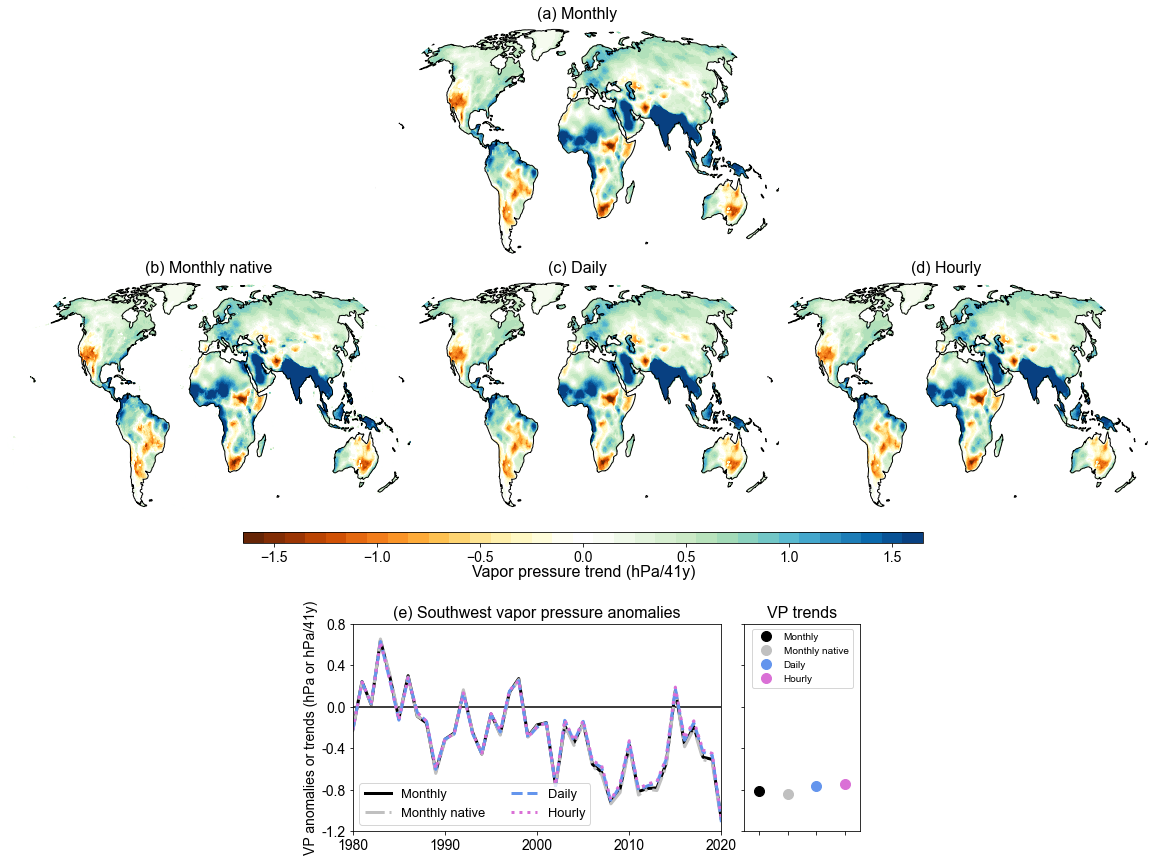

In [10]:
fig = plt.figure(figsize=(16,16))


ax = mymaps.contourmap_continentsonly_robinson_noborder_pos(fig, monthly_map*np.array(landfrac), monthly_map.lon, monthly_map.lat,0.1,-1.6,1.6,
                                                            '(a) Monthly',
                                                            0.32,0.67,0.75,0.95, cmap='precip', fontsize=16)

ax = mymaps.contourmap_continentsonly_robinson_noborder_pos(fig, monthly_map_native*np.array(landfrac_era5), monthly_map_native.lon, monthly_map_native.lat,0.1,-1.6,1.6,
                                                            '(b) Monthly native',
                                                            0.0,0.35,0.53,0.73, cmap='precip', fontsize=16)

ax = mymaps.contourmap_continentsonly_robinson_noborder_pos(fig, daily_map*np.array(landfrac), monthly_map.lon, monthly_map.lat,0.1,-1.6,1.6,
                                                            '(c) Daily',
                                                            0.32,0.67,0.53,0.73, cmap='precip', fontsize=16)

ax = mymaps.contourmap_continentsonly_robinson_noborder_pos(fig, hourly_map*np.array(landfrac), daily_map.lon, daily_map.lat,0.1,-1.6,1.6,
                                                            '(d) Hourly',
                                                            0.64,0.99,0.53,0.73, cmap='precip', fontsize=16)

ax = cbars.plotcolorbar(fig, 0.1, -1.6, 1.6,'Vapor pressure trend (hPa/41y)', 0.205,0.795,0.5,0.51,cmap='precip')




ax = fig.add_axes([0.3,0.25,0.32,0.18])
ax.set_ylim(-1.2,0.8)
ax.set_yticks([-1.2,-0.8,-0.4,0,0.4,0.8])
ax.set_yticklabels(['-1.2','-0.8','-0.4','0.0','0.4','0.8'], fontsize=14)
ax.set_xlim(1980,2020)
ax.set_xticks([1980,1990,2000,2010,2020])
ax.set_xticklabels(['1980','1990','2000','2010','2020'], fontsize=14)
ax.set_title('(e) Southwest vapor pressure anomalies', fontsize=16)
ax.set_ylabel('VP anomalies or trends (hPa or hPa/41y)', fontsize=14)
ax.plot([1980,2020],[0,0], color='black')

ax.plot(era5_monthly_am.year, era5_monthly_am - era5_monthly_am.sel(year=slice(1980,1990)).mean('year'), color='black', linewidth=3, label='Monthly')
ax.plot(era5_monthly_native_am.year, era5_monthly_native_am - era5_monthly_native_am.sel(year=slice(1980,1990)).mean('year'),
        color='silver', linewidth=3, linestyle='dashdot', label='Monthly native')
ax.plot(era5_daily_am.year, era5_daily_am - era5_daily_am.sel(year=slice(1980,1990)).mean('year'), color='cornflowerblue', linewidth=3, linestyle='dashed', label='Daily')
ax.plot(era5_hourly_am.year, era5_hourly_am - era5_hourly_am.sel(year=slice(1980,1990)).mean('year'), color='orchid', linewidth=3, linestyle='dotted', label='Hourly')

ax.legend(loc='lower left', ncol=2, prop={'size': 13})

ax = fig.add_axes([0.64,0.25,0.1,0.18])
ax.set_ylim(-1.2,0.8)
ax.set_xlim(0.5,4.5)
ax.set_yticks([-1.2,-0.8,-0.4,0,0.4,0.8])
ax.set_yticklabels([' ',' ' ,' ',' ',' ',' '], fontsize=14)
ax.set_xticks([1,2,3,4])
ax.set_xticklabels([' ',' ',' ',' '])
ax.set_title('VP trends', fontsize=16)

ax.plot(1, era5_monthly_trend, "o", color='black', markersize=10, label='Monthly')
ax.plot(2, era5_monthly_native_trend,"o", color='silver', markersize=10, label='Monthly native')
ax.plot(3, era5_daily_trend,"o", color='cornflowerblue', markersize=10, label='Daily')
ax.plot(4, era5_hourly_trend, "o", color='orchid', markersize=10, label='Hourly')

ax.legend(loc='upper center')


fig.savefig(plotpath+"figS4.pdf", bbox_inches="tight", facecolor='white')


In [39]:
print(landfrac_era5)

<xarray.DataArray 'lsm' (latitude: 721, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 2020-01-01
Attributes:
    units:          (0 - 1)
    long_name:      Land-sea mask
    standard_name:  land_binary_mask
